In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#reading the csv files
train=pd.read_csv("../input/spaceship-titanic/train.csv")
test=pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
train1=train.replace(False,0)
train2=train1.replace(True,1)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
occur = train.groupby(['Transported']).size()
display(occur)

Transported
False    4315
True     4378
dtype: int64

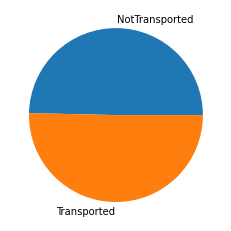

In [5]:
x=[4315,4378]
l=["NotTransported","Transported"]
plt.pie(x,labels=l)
plt.show()

In [6]:
g=train.groupby(['Destination','HomePlanet','Transported'])
cnt = g.PassengerId.nunique()
cnt
#from https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

Destination    HomePlanet  Transported
55 Cancri e    Earth       False           342
                           True            348
               Europa      False           275
                           True            611
               Mars        False            75
                           True            118
PSO J318.5-22  Earth       False           357
                           True            355
               Europa      False             5
                           True             14
               Mars        False            27
                           True             22
TRAPPIST-1e    Earth       False          1894
                           True           1207
               Europa      False           434
                           True            755
               Mars        False           720
                           True            755
Name: PassengerId, dtype: int64

Transported


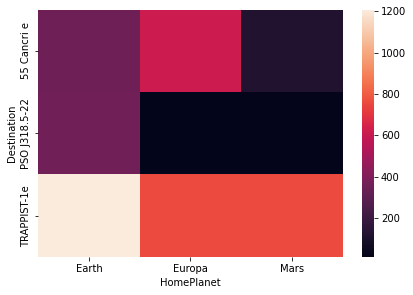


Not Transported


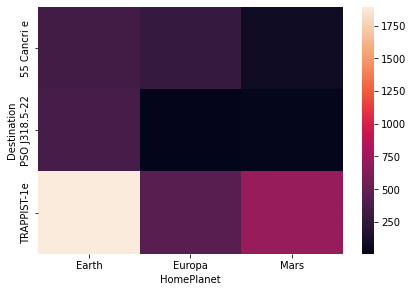

In [7]:
transported_cnt = cnt.loc[:,:,True].reset_index().pivot(index='Destination', columns='HomePlanet', values='PassengerId')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.heatmap(transported_cnt)
print("Transported")
plt.show()

notransported_cnt = cnt.loc[:,:,False].reset_index().pivot(index='Destination', columns='HomePlanet', values='PassengerId')
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sb.heatmap(notransported_cnt)
print("\nNot Transported")
plt.show()
#from https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

Text(0, 0.5, 'Number of Individuals')

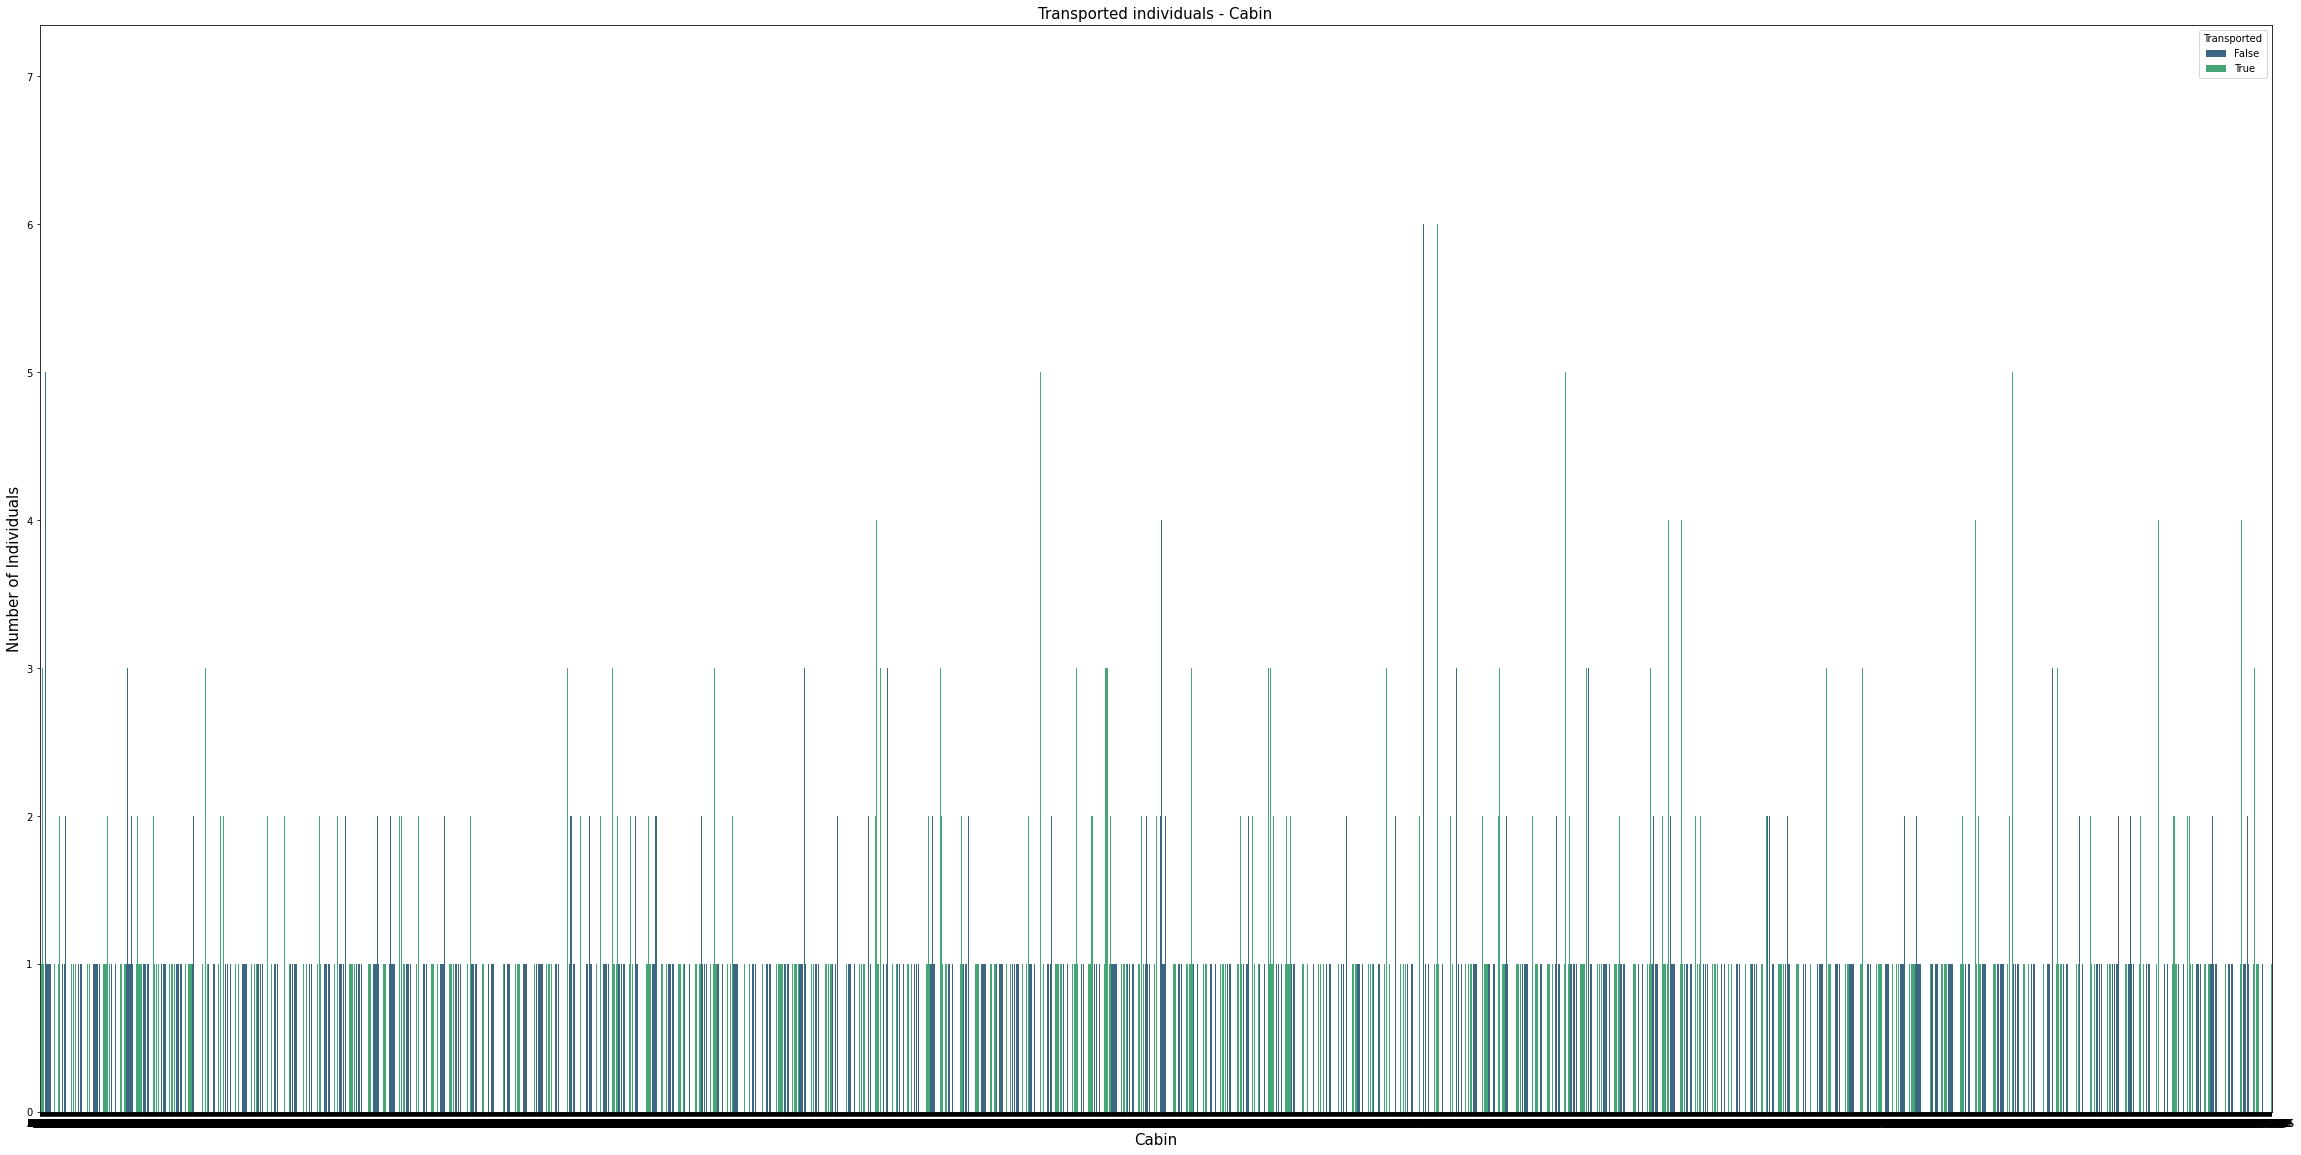

In [8]:
plt.figure(figsize=(40,20))
sb.countplot(x = train.Cabin, hue = train.Transported, palette="viridis")
plt.title('Transported individuals - Cabin', fontsize=15)
plt.xlabel('Cabin', fontsize=15)
plt.ylabel('Number of Individuals', fontsize=15)
#inspired from TITANIC(SPACESHIP)-VARIOUS MACHINE LEARNING MODEL

In [9]:
tAge = pd.crosstab(train['Transported'], train['Age'])
tAge

Age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Transported,,,,,,,,,,,,,,,,,,,,,
False,34,18,22,16,18,13,17,20,20,18,...,3,4,2,6,2,2,1,1,2,3
True,144,49,53,59,53,20,23,32,26,24,...,6,3,2,1,3,2,1,1,1,0


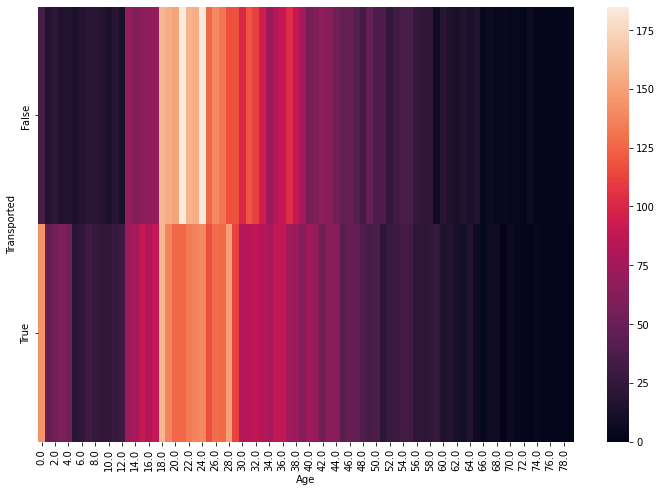

In [10]:
plt.figure(figsize=(12,8))
sb.heatmap(tAge)
plt.show()

Text(0, 0.5, 'Number of Individuals')

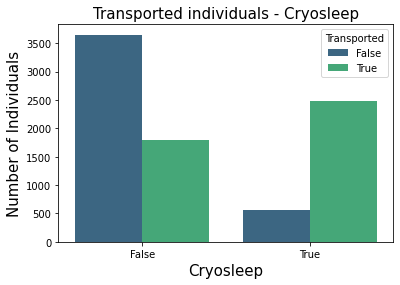

In [11]:
sb.countplot(x = train.CryoSleep, hue = train.Transported, palette="viridis")
plt.title('Transported individuals - Cryosleep', fontsize=15)
plt.xlabel('Cryosleep', fontsize=15)
plt.ylabel('Number of Individuals', fontsize=15)

In [12]:
tvip = pd.crosstab(train['Transported'], train['VIP'])
tvip

VIP,False,True
Transported,,
False,4093,123
True,4198,76


Transported


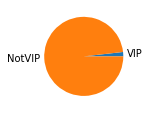



Not Transported


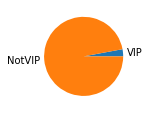

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [13]:
labels=["VIP","NotVIP"]
plt.subplot(2,2,1)
xt=np.array([76,4198])
plt.pie(xt,labels=labels)
print("Transported")
plt.show()

plt.subplot(2,2,1)
xn=np.array([123,4093])
plt.pie(xn,labels=labels)
print("\n\nNot Transported")
plt.show()
train

In [14]:
#defining features and target
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

features=["HomePlanet","CryoSleep","Destination","Age","VIP","FoodCourt","ShoppingMall","Spa","VRDeck"]
X=train[features]
Y=train.Transported
X1=test[features]

In [15]:
#hot-encoding
Xfinal=pd.get_dummies(X)
X1final=pd.get_dummies(X1)
Xfinal
#from https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding/notebook

,Age,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0
8690,26.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,0,0,1,1,0
8691,32.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,0,1,0


In [16]:
#dealing with missing values
missing_val = (train.isnull().sum())
missing_val

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
#imputation
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
Xfinal_imputed = my_imputer.fit_transform(Xfinal)
X1final_imputed = my_imputer.fit_transform(X1final)
#from https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook

In [18]:
clf=DecisionTreeClassifier()
clf = clf.fit(Xfinal_imputed,Y)
y_pred = clf.predict(X1final_imputed)
prediction=np.array(y_pred)
prediction

array([ True, False,  True, ...,  True, False, False])

In [19]:
my_submission = pd.DataFrame({'PassengerId' : test.PassengerId, 'Transported':prediction})
my_submission.to_csv('submission.csv', index=False)
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
